# Chapter 2 - Statistical Rethinking

In [63]:
%matplotlib inline
import pymc3 as pm
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
%config InlineBackend.figure_format = 'retina'
plt.style.use(['seaborn-colorblind', 'seaborn-darkgrid'])

In [64]:
def PosteriorGridBinomial(gridsize=100,success=6,trials=9):
    grid = np.linspace(0,1,gridsize)
    prior = np.repeat(1, gridsize) 
#     prior2=(grid>=0.5).astype(int)
#     prior3=np.exp(-5*np.abs(grid - 0.5))
    likelihood = stats.binom.pmf(success, n=trials,p=grid)
    posterior = likelihood*prior
    posterior = posterior/np.sum(posterior)
    return grid,posterior

In [65]:
p_grid, posterior = PosteriorGridBinomial(gridsize=1000)
samples = np.random.choice(p_grid, p=posterior, size=10000, replace=True)

In [66]:
samples

array([0.68668669, 0.76076076, 0.59059059, ..., 0.81781782, 0.66266266,
       0.63763764])

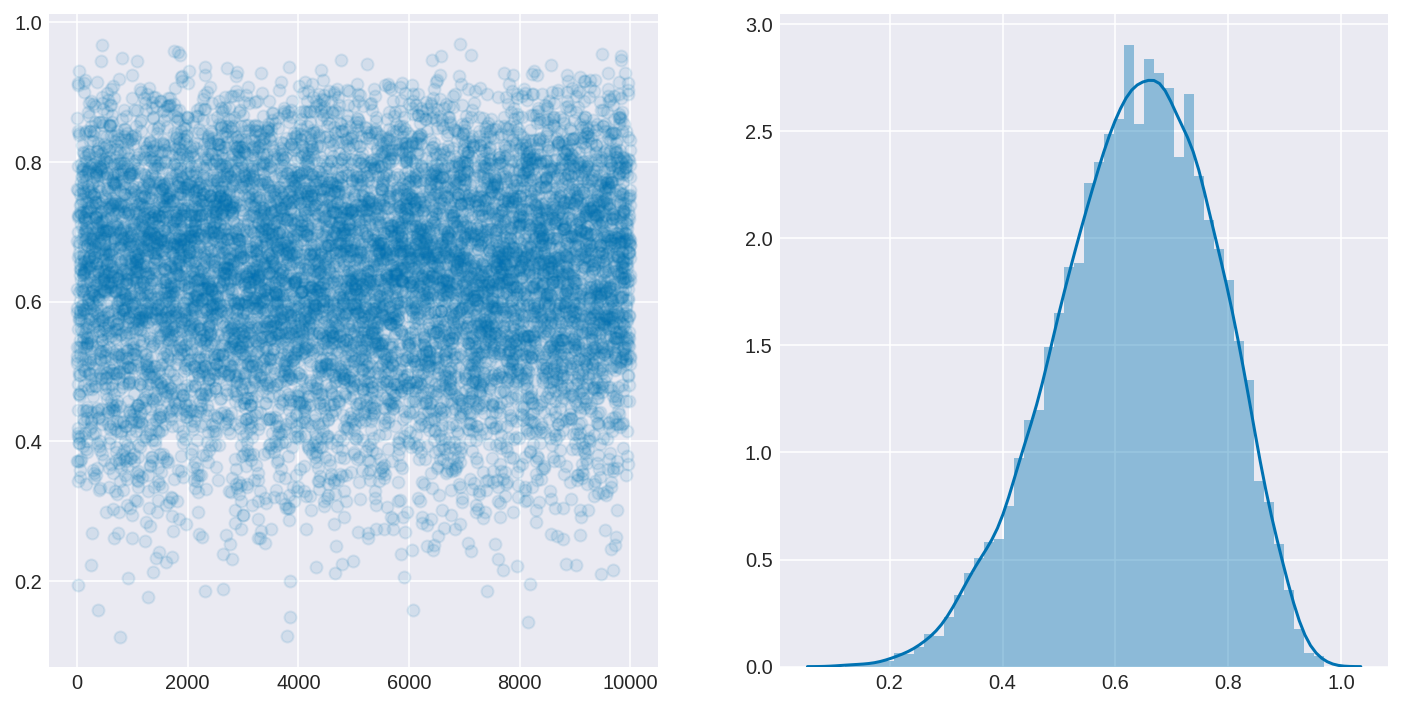

In [67]:
_, (ax0, ax1) = plt.subplots(1,2, figsize=(12,6))
ax0.plot(samples,'o',alpha=0.1)
sns.distplot(samples,ax=ax1,hist=True)

In [68]:
print(np.sum(posterior[(p_grid<0.5)&(p_grid>0.3)]))
print(np.sum(samples<0.5)/10000)

0.16132463196603153
0.1699


1.0

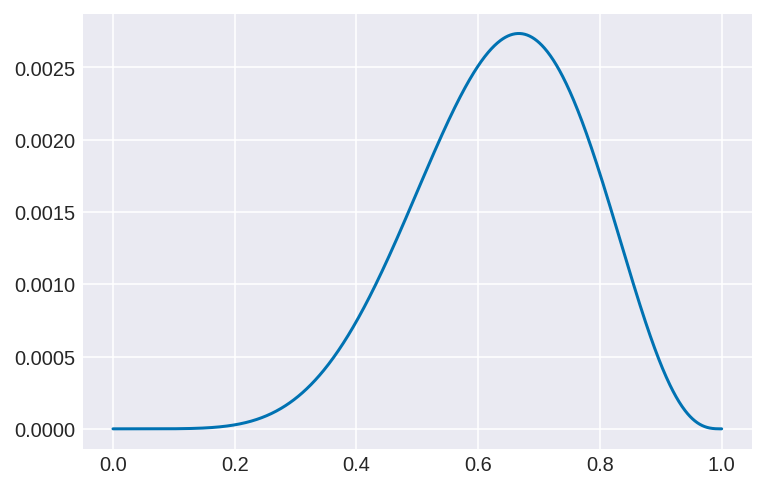

In [69]:
plt.plot(p_grid,posterior,'-')
np.sum(posterior)

In [70]:
p_grid, posterior = PosteriorGridBinomial(gridsize=1000,success=3,trials=3)
samples = np.random.choice(p_grid, p=posterior, size=10000, replace=True)

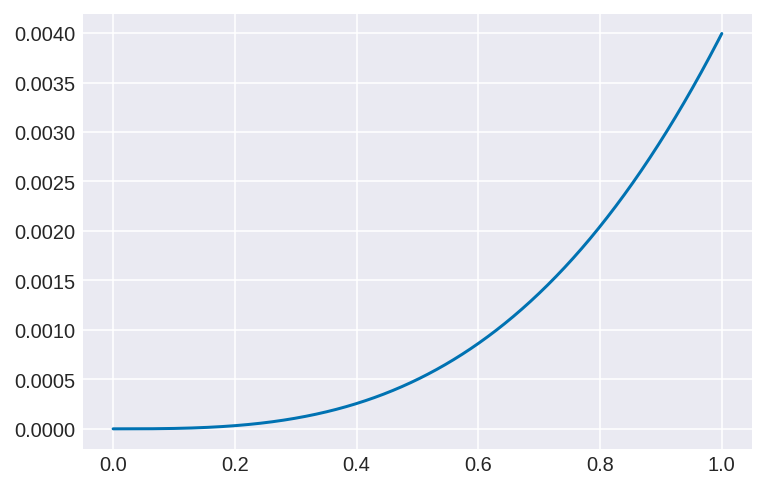

In [71]:
plt.plot(p_grid,posterior,'-')

In [72]:
samples = np.random.choice(p_grid, p=posterior, size=int(1e4), replace=True)
np.percentile(samples, [25, 75])

array([0.70670671, 0.92992993])

In [73]:
pm.hpd(samples, alpha=0.5)

array([0.83583584, 0.998999  ])

In [74]:
p_grid[posterior == max(posterior)]

array([1.])

In [75]:
stats.mode(samples)[0]

array([0.98598599])

### Calculating the loss function

Given an posterior probability density function, one must choose a point estimate. Such point estimate depends on the loss function attributed to "missing the target". So, suppose you want to minimize the amount of money you lose if you bet in the wrong value of a certain parameter, for example, we will draw a sample from the posterior and you should guess what value will come up. Now, if you get it wrong, you will be penalized by a certain amout. This amount is a function of how wrong you are. One exemple of loss function would be, you are penalize the same proportion of your mistake, so if the sample turns out to be 0.3 and you guessed 0.4, you lose 0.1 cents. Now, for this loss function, the best guess would be the median. If you change the loss function, so will change your best guest estiamte.

In [87]:
# Calculating the loss function with the example above... Say that you choose your estimate to be 0.3
# given the posterior probability, expected loss will be calculated by the following
penalty = np.sum(posterior*np.abs(0.5-p_grid))
print('Expected penalty(loss) for choosing 0.5 =',penalty)

# This is the same as taking many samples (say 10000), and calculating the average penalty you get for choosing
# such estimate. Let's do it again:
penalty = np.average(np.abs(0.5-samples))
print('Expected penalty(loss) for choosing 0.5 using samples=',penalty)

Expected penalty(loss) for choosing 0.5 = 0.31287518749981214
Expected penalty(loss) for choosing 0.5 using samples= 0.3115438438438438


[0.84084084]


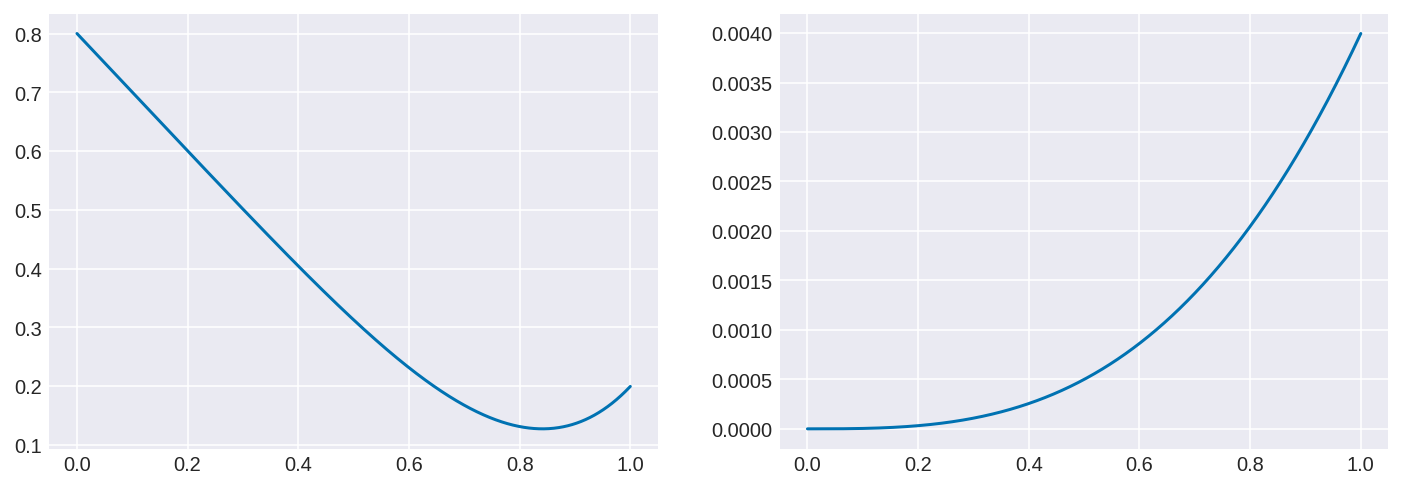

In [119]:
# We can construct the curve for choosing different estimates. A simple way is to repeat the above calculation
# for different estiamtes
loss_ = []
for estimate in np.linspace(0,1,10):
    loss_.append(np.sum(posterior*np.abs(estimate-p_grid)))

# another way would be:
loss = [sum(posterior * abs(p - p_grid)) for p in p_grid]

# we can use this to get the point estimate that gives the smallest loss
print(p_grid[loss == min(loss)])

_,(ax0,ax1) = plt.subplots(1,2,figsize=(12,4))
ax0.plot(p_grid,loss,'-')
ax1.plot(p_grid,posterior)

In [125]:
print(stats.binom.pmf(range(3), n=2, p=0.7))

print(stats.binom.rvs(n=2, p=0.7, size=10))

[0.09 0.42 0.49]
[1 1 2 2 1 1 1 1 2 1]


In [129]:
dummy = stats.binom.rvs(n=2,p=0.7,size=100000)
[(dummy == i).mean() for i in range(3)]

[0.08897, 0.41966, 0.49137]

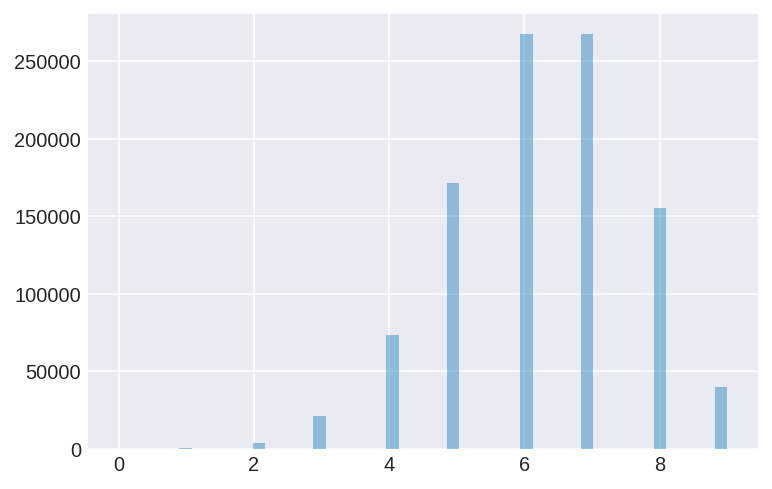

In [151]:
sns.distplot(stats.binom.rvs(n=9,p=0.7,size=10000),kde=False)

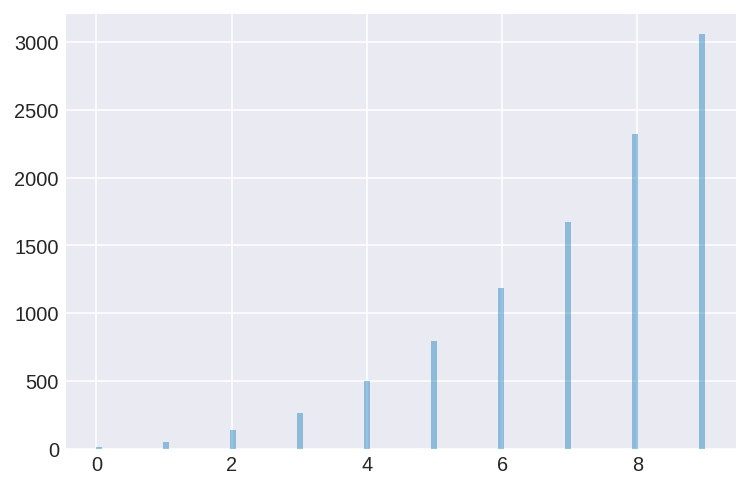

In [165]:
dummy = stats.binom.rvs(n=9, p=samples)
sns.distplot(dummy,kde=False,bins=100)

In [178]:
p_grid, posterior = PosteriorGridBinomial(gridsize=100, success=6, trials=9)
np.random.seed(5)
samples = np.random.choice(p_grid, p=posterior, size=int(1e4), replace=True)

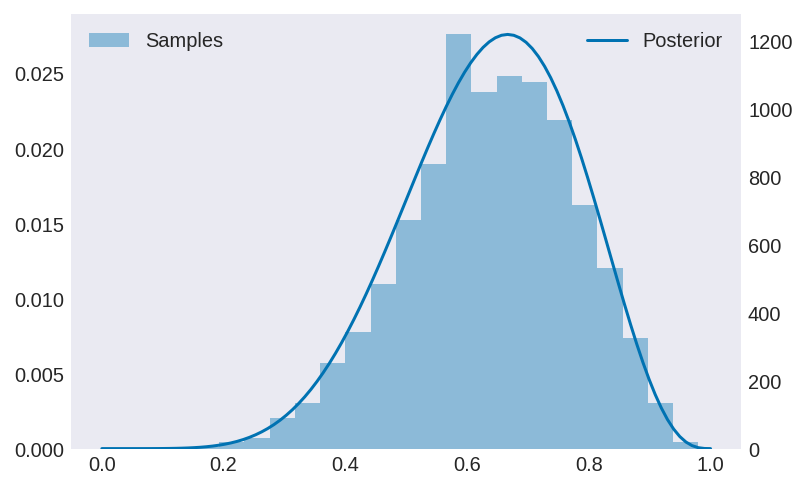

In [248]:
_,ax0 = plt.subplots()
ax0.plot(p_grid,posterior,label='Posterior')
ax0.set_ylim(bottom=0)
ax0.grid(b=False)
ax0.legend()
ax1 = ax0.twinx()
ax1.grid(b=False)
sns.distplot(samples, kde=False,ax=ax1,label='Samples',bins=20)
ax1.legend(loc=2)